Space X Falcon 9 First Stage Landing Prediction
Lab 2: Data wrangling
In this lab, we will perform some Exploratory Data Analysis (EDA) to find some patterns in the data and determine what would be the label for training supervised models.

In the data set, there are several different cases where the booster did not land successfully. Sometimes a landing was attempted but failed due to an accident; for example, True Ocean means the mission outcome was successfully landed to a specific region of the ocean while False Ocean means the mission outcome was unsuccessfully landed to a specific region of the ocean. True RTLS means the mission outcome was successfully landed to a ground pad False RTLS means the mission outcome was unsuccessfully landed to a ground pad.True ASDS means the mission outcome was successfully landed on a drone ship False ASDS means the mission outcome was unsuccessfully landed on a drone ship.

In this lab we will mainly convert those outcomes into Training Labels with 1 means the booster successfully landed 0 means it was unsuccessful.

Falcon 9 first stage will land successfully

Objectives
Perform exploratory Data Analysis and determine Training Labels

Exploratory Data Analysis
Determine Training Labels

In [1]:
!python -m install pandas
!python -m install numpy

c:\Users\user\AppData\Local\Programs\Python\Python313\python.exe: No module named install
c:\Users\user\AppData\Local\Programs\Python\Python313\python.exe: No module named install


Import Libraries and Define Auxiliary Functions
We will import the following libraries.

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

Data Analysis
Load Space X dataset, from last section.

In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


Identify and calculate the percentage of the missing values in each attribute

In [3]:
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

Identify which columns are numerical and categorical:

In [4]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
dtype: object

TASK 1: Calculate the number of launches on each site
The data contains several Space X launch facilities: Cape Canaveral Space Launch Complex 40 VAFB SLC 4E , Vandenberg Air Force Base Space Launch Complex 4E (SLC-4E), Kennedy Space Center Launch Complex 39A KSC LC 39A .The location of each Launch Is placed in the column LaunchSite

Next, let's see the number of launches for each site.

Use the method value_counts() on the column LaunchSite to determine the number of launches on each site:
# Apply value_counts() on column LaunchSite

In [5]:
# Calculate the number of launches on each site
launch_counts = df['LaunchSite'].value_counts()
print(launch_counts)

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


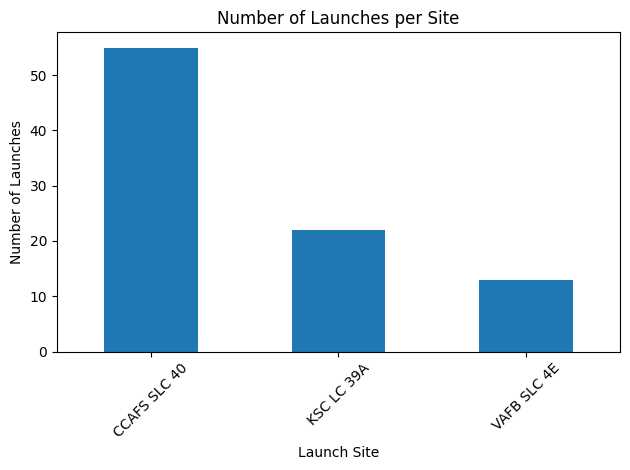

In [ ]:
#chart create
import matplotlib.pyplot as plt

launch_counts.plot(kind='bar', title='Number of Launches per Site')
plt.xlabel('Launch Site')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TASK 2: Calculate the number and occurrence of each orbit
Use the method .value_counts() to determine the number and occurrence of each orbit in the column Orbit

Note: Do not count GTO, as it is a transfer orbit and not itself geostationary.
# Apply value_counts on Orbit column

In [7]:
# Calculate the number and occurrence of each orbit, excluding GTO
orbit_counts = df[df['Orbit'] != 'GTO']['Orbit'].value_counts()
print(orbit_counts)


Orbit
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
HEO       1
ES-L1     1
SO        1
GEO       1
Name: count, dtype: int64


In [ ]:

#If you want to see the percentage distribution of each orbit (excluding GTO), you can do:

orbit_percentages = df[df['Orbit'] != 'GTO']['Orbit'].value_counts(normalize=True) * 100
print(orbit_percentages)
'''By default, value_counts() returns the absolute count of each unique value.
When you add normalize=True, it returns the proportion (i.e., percentage as a decimal) of each unique value relative to the total number of entries.
You can multiply by 100 to get percentages:

'''

Orbit
ISS      33.333333
VLEO     22.222222
PO       14.285714
LEO      11.111111
SSO       7.936508
MEO       4.761905
HEO       1.587302
ES-L1     1.587302
SO        1.587302
GEO       1.587302
Name: proportion, dtype: float64


TASK 3: Calculate the number and occurence of mission outcome of the orbits
Use the method .value_counts() on the column Outcome to determine the number of landing_outcomes.Then assign it to a variable landing_outcomes.
# landing_outcomes = values on Outcome column

In [9]:
# Calculate the number and occurrence of each mission outcome
landing_outcomes = df['Outcome'].value_counts()
print(landing_outcomes)

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64


In [ ]:

#If you want to see the percentage breakdown of each outcome:
landing_outcomes_percent = df['Outcome'].value_counts(normalize=True) * 100
print(landing_outcomes_percent)



Outcome
True ASDS      45.555556
None None      21.111111
True RTLS      15.555556
False ASDS      6.666667
True Ocean      5.555556
False Ocean     2.222222
None ASDS       2.222222
False RTLS      1.111111
Name: proportion, dtype: float64


True Ocean means the mission outcome was successfully landed to a specific region of the ocean while False Ocean means the mission outcome was unsuccessfully landed to a specific region of the ocean. True RTLS means the mission outcome was successfully landed to a ground pad False RTLS means the mission outcome was unsuccessfully landed to a ground pad.True ASDS means the mission outcome was successfully landed to a drone ship False ASDS means the mission outcome was unsuccessfully landed to a drone ship. None ASDS and None None these represent a failure to land.

In [ ]:
#Step 1: Enumerate all unique outcomes to understand their index positions
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [ ]:
## Step 2: Create a set of bad outcomes using index positions
#We create a set of outcomes where the second stage did not land successfully:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

TASK 4: Create a landing outcome label from Outcome column
Using the Outcome, create a list where the element is zero if the corresponding row in Outcome is in the set bad_outcome; otherwise, it's one. Then assign it to the variable landing_class:
# landing_class = 0 if bad_outcome
# landing_class = 1 otherwise

In [13]:
# Step 3: Create binary labels: 0 for bad outcomes, 1 for successful/partial landings
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in df['Outcome']]

In [14]:
# Step 4: Add the label to the DataFrame
df['Class'] = landing_class

In [15]:
# Step 5: Preview the result
df[['Outcome', 'Class']].head(10)

,Outcome,Class
0,None None,0
1,None None,0
2,None None,0
3,False Ocean,0
4,None None,0
5,None None,0
6,True Ocean,1
7,True Ocean,1
8,None None,0
9,None None,0


This variable will represent the classification variable that represents the outcome of each launch. If the value is zero, the first stage did not land successfully; one means the first stage landed Successfully

In [16]:
df['Class']=landing_class
df[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [17]:
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [18]:
#We can use the following line of code to determine the success rate:
df["Class"].mean()


np.float64(0.6666666666666666)

We can now export it to a CSV for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.

In [19]:
df.to_csv("dataset_part_2.csv", index=False)